In [1]:
import os 
import torch 
import numpy as np 
import random
from glob import glob
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    #torch.cuda.manual_seed_all(seed)            # 여러개 gpu 사용할 때
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)    

In [2]:
import pandas as pd
import random
import pandas as pd
import numpy as np
import os
import cv2

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
import torchvision.models as models

from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
!nvidia-smi

Tue Jan 10 19:24:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   32C    P8    23W / 350W |   5785MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install opencv-python

In [6]:
import cv2 
img=cv2.imread('/home/iai/heo/hackon/Cropped_train/Json/F01_P001_A1_W001_D2022-08-23-10-12-00_0018.PNG',cv2.IMREAD_COLOR)
print('img.shape: ', img.shape)

h,w,c=img.shape 
print('height', h)
print('width', w)
print('channel', c)

img.shape:  (1265, 584, 3)
height 1265
width 584
channel 3


In [7]:
train_imagefiles=glob("/home/iai/heo/hackon/Cropped_train/Json/*.PNG")

In [8]:
len(train_imagefiles)

11963

In [9]:
train=[name  for name in train_imagefiles]
# train=[name.replace("/home/iai/heo/hackon/Cropped_train/Json/","") for name in train]

In [10]:
train

['/home/iai/heo/hackon/Cropped_train/Json/F02_P001_A1_W001_D2022-08-24-11-15-55_1317.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F01_P001_A2_W001_D2022-08-23-10-23-00_0030.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F04_P001_A2_W001_D2022-09-16-10-13-12_3106.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F01_P001_A3_W001_D2022-08-23-10-14-00_0017.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F04_P001_A2_W001_D2022-09-16-10-13-12_1955.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F04_P001_A2_W001_D2022-09-16-10-13-12_1018.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F01_P001_A2_W001_D2022-08-23-10-12-00_0250.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F01_P001_A3_W001_D2022-08-23-10-14-00_0165.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F04_P001_A2_W001_D2022-09-16-10-13-12_2269.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F01_P001_A1_W001_D2022-08-23-10-22-00_0098.PNG',
 '/home/iai/heo/hackon/Cropped_train/Json/F03_P001_A2_W001_D2022-08-25-10-32-20_0506.PNG',

In [11]:
val_imagefiles=glob("/home/iai/heo/hackon/Cropped_val/Json/*.PNG")
val=[name  for name in val_imagefiles]
#val=[name.replace("/home/iai/heo/hackon/Cropped_val/Json/","") for name in val]
len(val)

3987

In [12]:
val

['/home/iai/heo/hackon/Cropped_val/Json/F04_P001_A2_W001_D2022-09-16-10-13-12_2361.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F04_P001_A2_W001_D2022-09-16-10-13-12_0551.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F02_P001_A2_W001_D2022-08-24-11-14-47_1149.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F01_P001_A2_W001_D2022-08-23-10-23-00_0499.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F04_P001_A1_W001_D2022-09-16-10-15-12_0065.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F01_P001_A1_W001_D2022-08-23-10-12-00_0156.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F02_P001_A1_W001_D2022-08-24-11-15-55_0602.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F03_P001_A1_W001_D2022-09-30-13-09-04_1261.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F01_P001_A1_W001_D2022-08-23-10-22-00_0691.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F05_P001_A2_W001_D2022-09-23-10-04-45_0169.PNG',
 '/home/iai/heo/hackon/Cropped_val/Json/F02_P001_A3_W001_D2022-08-24-11-14-35_0342.PNG',
 '/home/iai/heo/hacko

In [13]:
test_imagefiles=glob("/home/iai/heo/hackon/Cropped_test/Json/*.PNG")
test=[name for name in test_imagefiles]
#test=[name.replace("/home/iai/heo/hackon/Cropped_test/Json/","") for name in test]
len(test)

3989

In [14]:
test

['/home/iai/heo/hackon/Cropped_test/Json/F03_P001_A2_W001_D2022-08-25-10-42-30_0087.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F01_P002_A2_W001_D2022-08-23-10-29-00_0160.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F02_P001_A3_W001_D2022-08-24-11-14-35_0369.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F04_P002_A1_W002_D2022-09-16-10-56-38_0599.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F02_P001_A1_W001_D2022-08-24-11-15-55_0612.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F02_P001_A1_W001_D2022-08-24-11-15-55_1370.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F04_P001_A2_W001_D2022-09-16-10-13-12_2370.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F01_P001_A3_W001_D2022-08-23-10-22-00_0369.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F05_P001_A2_W001_D2022-09-23-10-04-45_0139.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F04_P001_A2_W001_D2022-09-16-10-13-12_2530.PNG',
 '/home/iai/heo/hackon/Cropped_test/Json/F05_P001_A1_W001_D2022-09-23-10-31-57_0756.PNG',
 '/home/ia

In [15]:

json_trainfiles=glob("/home/iai/heo/hackon/Cropped_train/Json/*.json")
json_train=[name.replace(".json","") for name in json_trainfiles]
json_train=[name.replace("/home/iai/heo/hackon/Cropped_train/Json/","") for name in json_train]
len(json_train)


11963

In [16]:

json_train

['F05_P001_A3_W001_D2022-09-23-10-07-45_1091',
 'F04_P001_A2_W001_D2022-09-16-10-13-12_2011',
 'F03_P001_A1_W001_D2022-08-25-10-32-05_0112',
 'F05_P001_A1_W001_D2022-09-23-10-31-57_0438',
 'F05_P001_A3_W001_D2022-09-23-10-23-27_0493',
 'F03_P002_A1_W002_D2022-08-25-11-08-08_0903',
 'F01_P001_A1_W001_D2022-08-23-10-22-00_0181',
 'F05_P001_A3_W001_D2022-09-23-10-23-27_0046',
 'F05_P001_A3_W001_D2022-09-23-10-07-45_0323',
 'F05_P001_A1_W001_D2022-09-23-10-31-57_0016',
 'F03_P001_A1_W001_D2022-09-30-13-09-04_0951',
 'F02_P001_A2_W001_D2022-08-24-11-14-47_1348',
 'F03_P001_A2_W001_D2022-08-25-10-42-30_1005',
 'F05_P001_A3_W001_D2022-09-23-10-07-45_1038',
 'F04_P001_A2_W001_D2022-09-16-10-13-12_0526',
 'F05_P001_A3_W001_D2022-09-23-10-23-27_0268',
 'F04_P001_A2_W001_D2022-09-16-10-13-12_1804',
 'F01_P001_A1_W001_D2022-08-23-10-12-00_0482',
 'F02_P001_A1_W001_D2022-08-24-11-15-55_1216',
 'F02_P001_A3_W001_D2022-08-24-11-14-35_1320',
 'F04_P001_A2_W001_D2022-09-16-10-13-12_0662',
 'F01_P002_A2

In [17]:

json_valfiles=glob("/home/iai/heo/hackon/Cropped_val/Json/*.json")
json_val=[name.replace(".json","") for name in json_valfiles]
json_val=[name.replace("/home/iai/heo/hackon/Cropped_val/Json/","") for name in json_val]
len(json_val)


3987

In [18]:
json_testfiles=glob("/home/iai/heo/hackon/Cropped_test/Json/*.json")
json_test=[name.replace(".json","") for name in json_testfiles]
json_test=[name.replace("/home/iai/heo/hackon/Cropped_test/Json/","") for name in json_test]
len(json_test)

3989

In [19]:
json_test[1]

'F01_P001_A3_W001_D2022-08-23-10-22-00_0369'

In [20]:
import torch
import json
from PIL import Image 


keys=['neck_twist','neck_bending','trunk_twist','trunk_bending','legs_supported','upperarm_abduction','upperarm_raised','upperarm_across','upperarm_supported','lowerarm_outbody','wrist_bending',
      'wrist_twisted','wrist_twisted_end']

#keys=['neck_twist','neck_bending'] 
class traindataset(torch.utils.data.Dataset):
  def __init__(self, t, transform):

    self.json_path=t
    self.full_filenames=[f for f in t]
    self.transform=transform 
  
  def __len__(self):
    return len(self.full_filenames)
  
  def __getitem__(self, idx):
    image=Image.open(self.full_filenames[idx])
    image=self.transform(image)
    
    if self.transform is not None:
      with open(os.path.join('/home/iai/heo/hackon/Cropped_train/Json/', self.json_path[idx].split('.')[0][-42:])+'.json') as f:
        json_data=json.load(f)
      #y=int(float(json_data['annotations'][0]['posture']['neck']))           # 문자형을 정수형으로 바꿀 때 문자형을 먼저 실수형으로 바꾼다.
      label=[int(float(json_data['annotations'][0][key])) for key in keys]
      label=torch.FloatTensor(label)
      return image, label
    else:
      return image


In [21]:
!nvidia-smi

Tue Jan 10 19:24:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   32C    P8    23W / 350W |   5785MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
# val data의 customdataset

class valdataset(torch.utils.data.Dataset):
  def __init__(self, t, transform):

    self.json_path=t
    self.full_filenames=[f for f in t]
    self.transform=transform 
  
  def __len__(self):
    return len(self.full_filenames)
  
  def __getitem__(self, idx):
    image=Image.open(self.full_filenames[idx])
    image=self.transform(image)
  
    if self.transform is not None:
    
      with open(os.path.join('/home/iai/heo/hackon/Cropped_val/Json/', self.json_path[idx].split('.')[0][-42:])+'.json') as f:
        json_data=json.load(f)
    #y=int(float(json_data['annotations'][0]['posture']['neck']))
      label=[int(float(json_data['annotations'][0][key])) for key in keys]
      label=torch.FloatTensor(label)
      return image, label
    else:
      return image 


In [23]:
#import json
#keys=['neck_twist','neck_bending','trunk_twist','trunk_bending','trunk_supported','legs_supported','upperarm_abduction','upperarm_raised','upperarm_supported','upperarm_across','lowerarm_outbody','wrist_bending',
#      'wrist_twisted','wrist_twisted_end'] 
#with open('/home/iai/heo/hackon/Cropped_val/Json/F05_P001_A3_W001_D2022-09-23-10-23-27_0427.json','r') as f:
#  json_data=json.load(f)
#values=[json_data['annotations'][0][key] for key in keys]
#json_data['annotations'][0]['neck_twisted']
#values

In [24]:
# test data의 customdataset

class testdataset(torch.utils.data.Dataset):
  def __init__(self, t, transform):

    self.json_path=t
    self.full_filenames=[f for f in t]
    self.transform=transform 
  
  def __len__(self):
    return len(self.full_filenames)
  
  def __getitem__(self, idx):
    image=Image.open(self.full_filenames[idx])
    image=self.transform(image)
    
    if self.transform is not None:
      with open(os.path.join('/home/iai/heo/hackon/Cropped_test/Json/', self.json_path[idx].split('.')[0][-42:])+'.json') as f:
        json_data=json.load(f)     
    #y=int(float(json_data['annotations'][0]['posture']['neck']))
      label=[int(float(json_data['annotations'][0][key])) for key in keys]
      label=torch.FloatTensor(label)
      return image, label
    else:
      return image

In [25]:
#import torchvision.transforms as transforms
#train_transforms=transforms.Compose([transforms.Resize((80,80)),transforms.RandomChoice(
#                           [transforms.ColorJitter(brightness=(0,10)),
#                            transforms.ColorJitter(saturation=(0,10))]),                         
#                           transforms.ToTensor(),
#                           transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))])

In [26]:
import torchvision.transforms as transforms
train_transforms=transforms.Compose([transforms.Resize((80,80)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))])

In [27]:
val_transforms=transforms.Compose([transforms.Resize((80,80)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))])

In [28]:
test_transforms=transforms.Compose([transforms.Resize((80,80)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))])

In [29]:
tr_data=traindataset(train,train_transforms)

In [30]:
val_data=valdataset(val,val_transforms)

In [31]:
test_data=testdataset(test,test_transforms)

In [32]:
len(tr_data)

11963

In [33]:
len(val_data)

3987

In [34]:
!nvidia-smi

Tue Jan 10 19:24:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   32C    P8    23W / 350W |   5785MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
len(test_data)

3989

In [36]:
tr_data.__getitem__(2)

(tensor([[[ 0.7419,  0.4679, -0.0287,  ..., -1.1075, -1.1932, -1.1760],
          [ 0.6734,  0.6221,  0.4166,  ..., -0.5596, -0.7308, -0.8678],
          [ 0.6392,  0.5707,  0.5022,  ..., -0.5938, -0.5767, -0.8678],
          ...,
          [-0.5938, -0.6109, -0.8678,  ..., -0.8164, -0.6965, -0.4911],
          [-0.6965, -0.9020, -0.9705,  ..., -0.6109, -0.5596, -0.4739],
          [-0.4397, -0.7479, -0.9534,  ...,  0.0056,  0.0227,  0.0912]],
 
         [[ 0.7129,  0.4853,  0.0301,  ..., -1.0378, -1.1604, -1.1078],
          [ 0.6254,  0.5553,  0.3803,  ..., -0.6001, -0.8803, -1.0028],
          [ 0.5553,  0.5028,  0.4328,  ..., -0.6001, -0.8452, -1.2479],
          ...,
          [-0.5126, -0.5301, -0.7752,  ..., -0.8452, -0.7227, -0.5301],
          [-0.6176, -0.8277, -0.8803,  ..., -0.6527, -0.6001, -0.5126],
          [-0.3375, -0.6702, -0.8627,  ...,  0.1001,  0.1527,  0.2052]],
 
         [[ 1.1237,  0.8622,  0.4265,  ..., -0.7936, -0.9156, -0.8633],
          [ 1.0365,  0.9494,

In [37]:


val_data.__getitem__(3)

(tensor([[[-0.8678,  0.0227, -0.0287,  ..., -0.2856, -0.3883, -0.4226],
          [-0.3712,  0.9817,  0.8104,  ..., -0.1314, -0.2342, -0.2513],
          [ 0.1426,  1.7352,  1.4612,  ..., -0.1999, -0.1999, -0.1143],
          ...,
          [-1.1247, -1.1418, -1.1247,  ..., -0.8507, -0.8335, -0.8164],
          [-1.1418, -1.1760, -1.1589,  ..., -0.6965, -0.7308, -0.6452],
          [-1.1760, -1.1760, -1.1760,  ..., -0.1486, -0.1486, -0.0801]],
 
         [[-0.5301,  0.2227,  0.1001,  ..., -0.1800, -0.2850, -0.3200],
          [-0.0574,  1.2206,  0.9755,  ..., -0.0224, -0.1275, -0.1450],
          [ 0.4328,  1.9909,  1.6232,  ..., -0.0924, -0.0924, -0.0049],
          ...,
          [-0.1800, -0.1975, -0.1800,  ..., -0.8452, -0.8277, -0.8452],
          [-0.1975, -0.2325, -0.2150,  ..., -0.7052, -0.7577, -0.7052],
          [-0.2325, -0.2325, -0.2325,  ..., -0.2850, -0.3200, -0.2500]],
 
         [[-0.5844,  0.4265,  0.3568,  ..., -0.0267, -0.1312, -0.1661],
          [ 0.0082,  1.5245,

In [38]:
val_data.__getitem__(4)

(tensor([[[-0.8678, -1.0904, -1.1589,  ..., -1.8097, -1.8268, -1.8439],
          [-0.7993, -1.0048, -1.0904,  ..., -1.8782, -1.8953, -1.8953],
          [-0.6965, -0.6794, -0.6965,  ..., -1.5528, -1.5870, -1.6213],
          ...,
          [-1.6042, -1.5699, -1.5185,  ..., -1.7069, -1.8097, -1.8439],
          [-1.6042, -1.5699, -1.5014,  ..., -1.4158, -1.5357, -1.6384],
          [-1.5870, -1.5870, -1.5528,  ..., -1.2959, -1.3987, -1.5528]],
 
         [[-0.7227, -0.9678, -1.0553,  ..., -1.7031, -1.7206, -1.7381],
          [-0.6702, -0.8978, -0.9678,  ..., -1.7906, -1.7906, -1.8081],
          [-0.5301, -0.5301, -0.5476,  ..., -1.4405, -1.4755, -1.5105],
          ...,
          [-1.5280, -1.4930, -1.4755,  ..., -1.6331, -1.7556, -1.7731],
          [-1.5280, -1.5105, -1.4405,  ..., -1.2479, -1.4055, -1.5280],
          [-1.5280, -1.5280, -1.4930,  ..., -1.1078, -1.2304, -1.4230]],
 
         [[-0.5147, -0.8110, -0.9156,  ..., -1.5430, -1.5604, -1.5604],
          [-0.4450, -0.6890,

In [39]:
test_data.__getitem__(4)

(tensor([[[ 2.2489,  2.2489,  2.2489,  ..., -0.4911,  0.0912,  1.1700],
          [ 2.2489,  2.2489,  2.2489,  ..., -0.4054,  0.2111,  1.1872],
          [ 2.1633,  2.1633,  2.1633,  ..., -0.3883,  0.2624,  1.1872],
          ...,
          [ 0.8104,  0.9817,  0.9132,  ..., -1.8782, -1.9124, -1.9124],
          [ 0.8276,  1.0159,  0.9303,  ..., -1.4158, -1.8268, -1.8782],
          [ 0.7933,  0.7591,  0.4508,  ..., -1.4158, -1.6555, -1.6555]],
 
         [[ 2.4286,  2.4286,  2.4286,  ..., -0.3901,  0.2577,  1.4657],
          [ 2.4286,  2.4286,  2.4286,  ..., -0.3025,  0.3803,  1.4832],
          [ 2.3410,  2.3585,  2.3585,  ..., -0.2675,  0.4503,  1.5007],
          ...,
          [ 0.8354,  1.0455,  0.9580,  ..., -1.7731, -1.7906, -1.7906],
          [ 0.8880,  1.0630,  0.9580,  ..., -1.3004, -1.6856, -1.7381],
          [ 0.8704,  0.8179,  0.4853,  ..., -1.3179, -1.5280, -1.5455]],
 
         [[ 2.6400,  2.6400,  2.6400,  ..., -0.2358,  0.4439,  1.8208],
          [ 2.6400,  2.6400,

In [40]:
tr_loader=torch.utils.data.DataLoader(tr_data,batch_size=1000, shuffle=True, drop_last=True)
val_loader=torch.utils.data.DataLoader(val_data,batch_size=1000, shuffle=False,drop_last=True)

In [41]:
import torch
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print('Device: ',device)
print('Current cuda device: ', torch.cuda.current_device())
print('Count of using GPUs : ', torch.cuda.device_count())

Device:  cuda
Current cuda device:  0
Count of using GPUs :  1


In [42]:
[float(a) for a in [2,3]]

[2.0, 3.0]

In [43]:
import torch.nn as nn 
import torchvision.models as models 

class BaseModel(nn.Module):
    def __init__(self, num_classes=13):
        super(BaseModel, self).__init__()
        self.backbone = models.efficientnet_b0(pretrained=True)
        self.classifier = nn.Linear(1000, num_classes)
        
    def forward(self, x):
        x = self.backbone(x)
        x = F.sigmoid(self.classifier(x))
        return x

In [44]:
def train(model, optimizer, train_loader, val_loader, scheduler, device):
    model.to(device)
    criterion = nn.BCELoss().to(device)
    
    best_val_acc = 0
    best_model = None
    trains_loss=[]
    validations_loss=[]
    training_accuracy=[]
    validation_accuracy=[]
    for epoch in range(0, 15):
        model.train()
        train_loss = []
        for imgs, labels in tqdm(iter(train_loader)):
            imgs = imgs.float().to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            
            output = model(imgs)
            
            loss = criterion(output, labels)
    
            loss.backward()
            optimizer.step()
            
            train_loss.append(loss.item())   
        _val_loss, _val_acc = validation(model, criterion, val_loader, device)
        _train_loss = np.mean(train_loss)
        print(f'Epoch [{epoch}],  Train Loss : [{_train_loss:.5f}] Val Loss : [{_val_loss:.5f}] Val ACC : [{_val_acc:.5f}]')
        trains_loss.append(_train_loss)
        validations_loss.append(_val_loss)
        validation_accuracy.append(_val_acc)
        if scheduler is not None:
            scheduler.step(_val_acc)
            
        if best_val_acc < _val_acc:
            best_val_acc = _val_acc
            best_model = model
    
    return best_model,trains_loss,validations_loss, validation_accuracy

In [45]:
def validation(model, criterion, val_loader, device):
    model.eval()
    val_loss = []
    val_acc = []
    with torch.no_grad():
        for imgs, labels in tqdm(iter(val_loader)):
            imgs = imgs.float().to(device)
            labels = labels.to(device)
            
            probs = model(imgs)
            
            loss = criterion(probs, labels)
            probs  = probs.cpu().detach().numpy()
            labels = labels.cpu().detach().numpy()
            preds = probs > 0.5
            batch_acc = (labels == preds).mean()
            
            val_acc.append(batch_acc)
            
            val_loss.append(loss.item())
        
        _val_loss = np.mean(val_loss)
        _val_acc = np.mean(val_acc)
    
    return _val_loss, _val_acc

In [46]:
model=BaseModel()
model.eval()

BaseModel(
  (backbone): EfficientNet(
    (features): Sequential(
      (0): ConvNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): ConvNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (scale_activa

In [47]:
# 클래스 weight 해줄 때
#weights=torch.FloatTensor([8/13,5/13]).cuda()
#criterion=torch.nn.CrossEntropyLoss(weight=weights)
optimizer=torch.optim.AdamW(model.parameters(),lr=0.0001, weight_decay=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.1, patience=2,threshold_mode='abs',min_lr=1e-8,verbose=True)

In [47]:
infer_model,train_loss,val_loss,val_accuracy = train(model, optimizer, tr_loader, val_loader, scheduler, device)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [0],  Train Loss : [0.64559] Val Loss : [0.51604] Val ACC : [0.75233]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1],  Train Loss : [0.44622] Val Loss : [0.39958] Val ACC : [0.82997]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [2],  Train Loss : [0.38096] Val Loss : [0.37340] Val ACC : [0.83887]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [3],  Train Loss : [0.35753] Val Loss : [0.36185] Val ACC : [0.84159]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [4],  Train Loss : [0.34091] Val Loss : [0.35535] Val ACC : [0.84462]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [5],  Train Loss : [0.33041] Val Loss : [0.35115] Val ACC : [0.84664]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [6],  Train Loss : [0.31932] Val Loss : [0.34841] Val ACC : [0.84851]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [7],  Train Loss : [0.31070] Val Loss : [0.34609] Val ACC : [0.84979]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [8],  Train Loss : [0.30383] Val Loss : [0.34498] Val ACC : [0.85128]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [9],  Train Loss : [0.29395] Val Loss : [0.34346] Val ACC : [0.85136]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [10],  Train Loss : [0.28808] Val Loss : [0.34270] Val ACC : [0.85169]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [11],  Train Loss : [0.28028] Val Loss : [0.34230] Val ACC : [0.85256]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [12],  Train Loss : [0.27508] Val Loss : [0.34264] Val ACC : [0.85272]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [13],  Train Loss : [0.26785] Val Loss : [0.34296] Val ACC : [0.85323]


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch [14],  Train Loss : [0.26080] Val Loss : [0.34415] Val ACC : [0.85313]


## 모델 가중치 저장하기

In [48]:
torch.save(infer_model.state_dict(),'efficient_model.pth')

## 모델 로드하기

In [48]:
import  os 
os.chdir('/home/iai/heo/hackon/')

In [49]:
infer_model=BaseModel()
infer_model.load_state_dict(torch.load('/home/iai/heo/hackon/efficient_model.pth'))

<All keys matched successfully>

## Inference

In [50]:
!nvidia-smi

Tue Jan 10 19:32:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   36C    P2   114W / 350W |  14259MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [50]:
train_loss

[0.6455874713984403,
 0.4462246840650385,
 0.3809605267914859,
 0.3575312982905995,
 0.3409104184670882,
 0.330413818359375,
 0.31931829994375055,
 0.31070068207654084,
 0.30383027412674646,
 0.29395324804566125,
 0.2880807546052066,
 0.28027786179022357,
 0.2750754816965623,
 0.26785390214486554,
 0.2608043212782253]

In [51]:
val_loss

[0.5160444378852844,
 0.3995817204316457,
 0.3734019696712494,
 0.36184998353322345,
 0.3553461929162343,
 0.3511500855286916,
 0.3484116693337758,
 0.34609387318293255,
 0.3449830810228984,
 0.3434641758600871,
 0.34269856413205463,
 0.3423028786977132,
 0.3426400621732076,
 0.3429644803206126,
 0.34414659937222797]

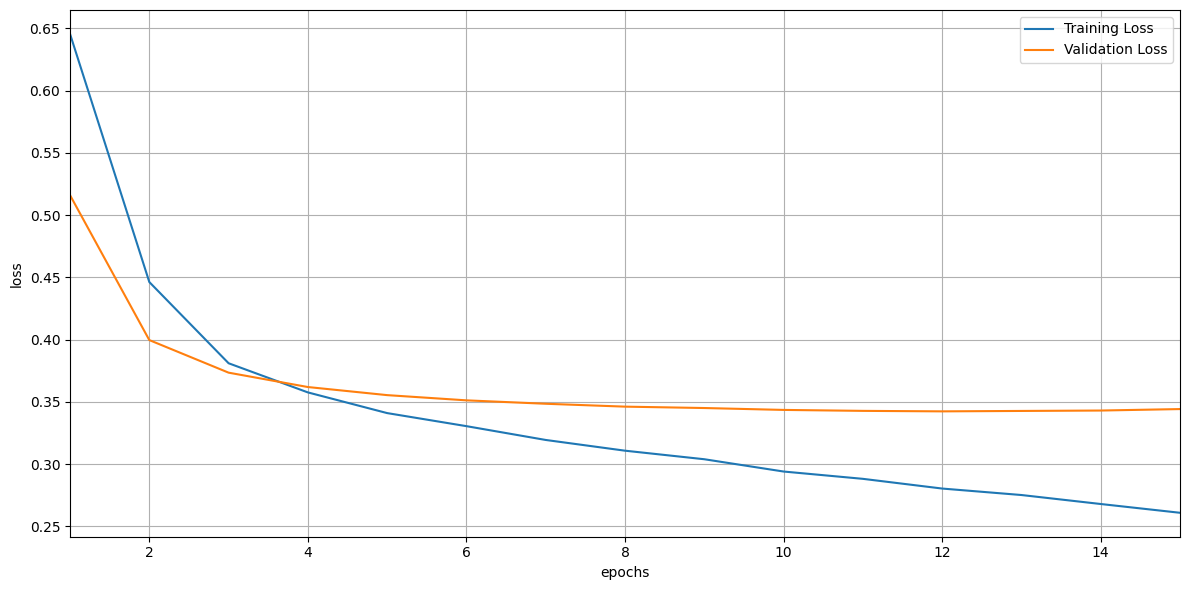

In [52]:
import matplotlib.pyplot as plt 

fig=plt.figure(figsize=(12,6)) 
plt.plot(range(1,len(train_loss)+1),train_loss,label='Training Loss') 
plt.plot(range(1,len(val_loss)+1),val_loss,label='Validation Loss') 
plt.xlabel('epochs') 
plt.ylabel('loss') 
plt.xlim(1, len(train_loss))            # 일정한 scale 
plt.grid(True) 
plt.legend()
plt.tight_layout() 
plt.show()
fig.savefig('loss_plot.png',bbox_inches='tight')




In [53]:
!nvidia-smi

Mon Jan  9 17:38:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   38C    P2   115W / 350W |  14400MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Test 

In [51]:
test_loader=torch.utils.data.DataLoader(test_data,batch_size=1000,shuffle=False)

In [52]:
def inference(model,test_loader,device):
    model.to(device)
    model.eval()
    predictions=[]
    label_list=[]
    with torch.no_grad():
        for imgs,labels in tqdm(iter(test_loader)):
            imgs=imgs.float().to(device) 
            labels=labels
            probs=model(imgs) 
            
            probs=probs.cpu().detach().numpy()
            labels=labels.cpu().detach().numpy() 
            preds=probs > 0.5
            preds=preds.astype(int) 
            predictions+=preds.tolist()
            label_list+=labels.tolist()
    return predictions,label_list            
        
            
            

In [53]:
preds,true_labels=inference(infer_model,test_loader,device)

  0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
print(len(preds))
print(len(true_labels))

3989
3989


## Confusion Matrix

In [57]:
import numpy as np 
from sklearn.metrics import multilabel_confusion_matrix
preds_numpy=np.array(preds) 
true_numpy=np.array(true_labels) 


In [58]:
multilabel_confusion_matrix(true_numpy,preds_numpy)

array([[[1059,  696],
        [ 586, 1648]],

       [[2561,  305],
        [ 743,  380]],

       [[2913,  175],
        [ 591,  310]],

       [[2905,  211],
        [ 466,  407]],

       [[3658,   80],
        [ 161,   90]],

       [[3606,   38],
        [ 231,  114]],

       [[3894,    8],
        [  81,    6]],

       [[3809,    8],
        [ 169,    3]],

       [[3749,   21],
        [ 198,   21]],

       [[ 450,  682],
        [ 284, 2573]],

       [[3236,  105],
        [ 499,  149]],

       [[1451,  630],
        [ 578, 1330]],

       [[3847,    8],
        [ 131,    3]]])

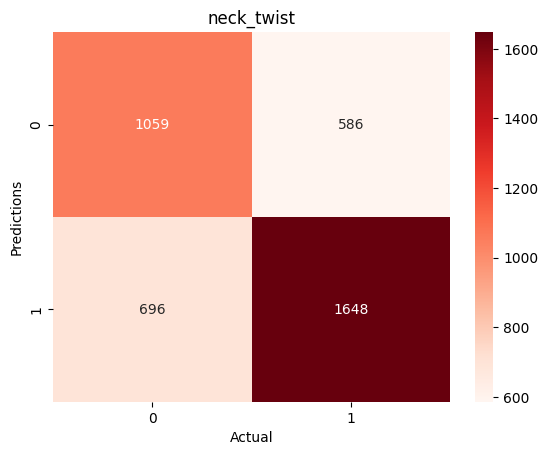

In [60]:
# neck_twist 혼동행렬 시각화
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[0],annot=True, fmt='d',cmap='Reds').set(title=keys[0])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [61]:
# Neck twisted 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[0][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[0][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[0][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[0][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[0][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[0][1][1])

0.6786161945349711

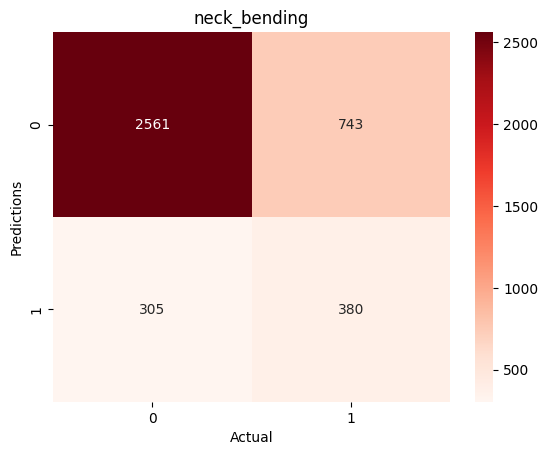

In [62]:
# neck_bending 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[1],annot=True, fmt='d',cmap='Reds').set(title=keys[1])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [63]:
# Neck bending 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[1][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[1][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[1][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[1][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[1][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[1][1][1])

0.7372775131611933

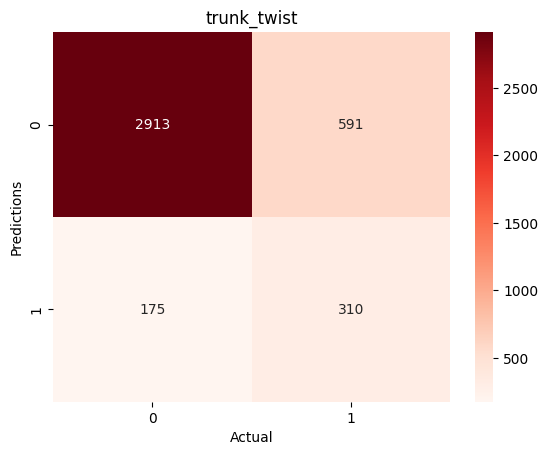

In [64]:
# trunk_twist 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[2],annot=True, fmt='d',cmap='Reds').set(title=keys[2])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [65]:
# trunk_twist 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[2][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[2][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[2][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[2][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[2][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[2][1][1])

0.807971922787666

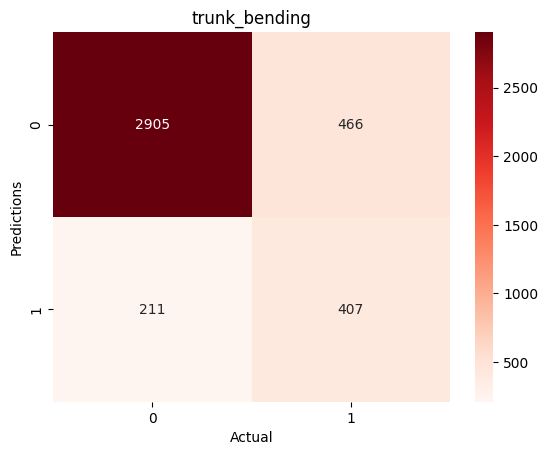

In [66]:
# trunk_bending 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[3],annot=True, fmt='d',cmap='Reds').set(title=keys[3])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [67]:
# trunk_bending 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[3][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[3][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[3][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[3][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[3][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[3][1][1])

0.8302832790172976

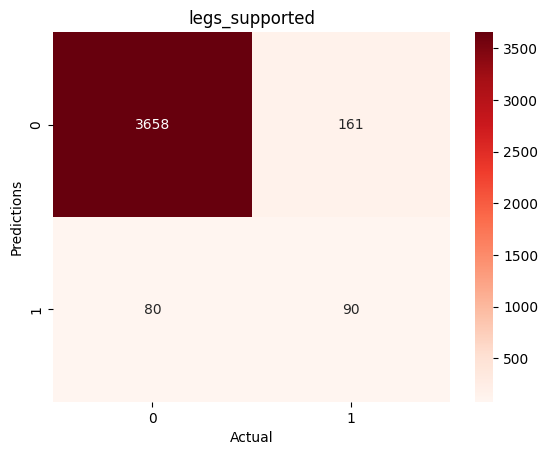

In [69]:
# legs_supported 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[4],annot=True, fmt='d',cmap='Reds').set(title=keys[4])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [70]:
# legs_supported 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[4][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[4][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[4][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[4][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[4][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[4][1][1])

0.939583855602908

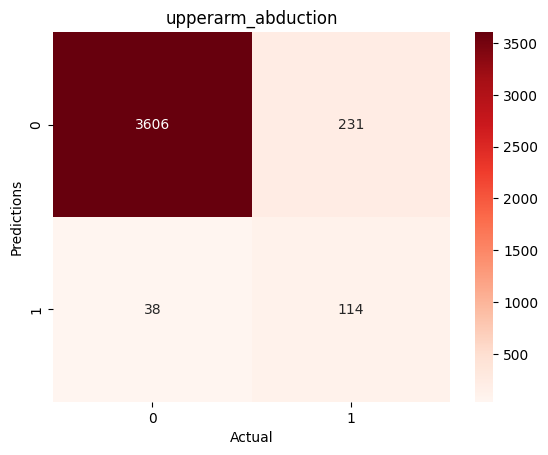

In [71]:
# upperarm_abduction 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[5],annot=True, fmt='d',cmap='Reds').set(title=keys[5])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [109]:
# upperarm_abduction 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[5][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[5][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[5][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[5][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[5][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[5][1][1])

0.9325645525194284

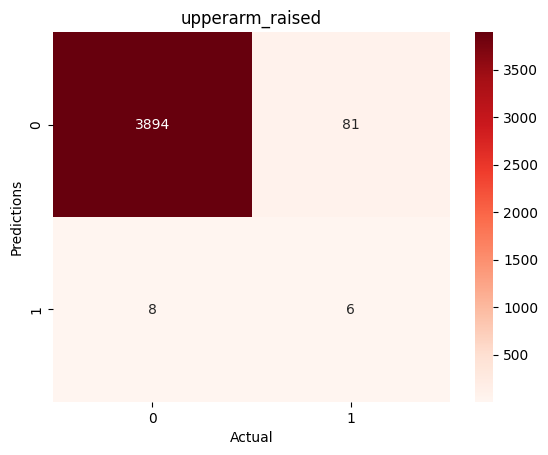

In [72]:
# upperarm_raised 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[6],annot=True, fmt='d',cmap='Reds').set(title=keys[6])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [73]:
# upperarm_raised 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[6][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[6][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[6][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[6][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[6][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[6][1][1])

0.9776886437703685

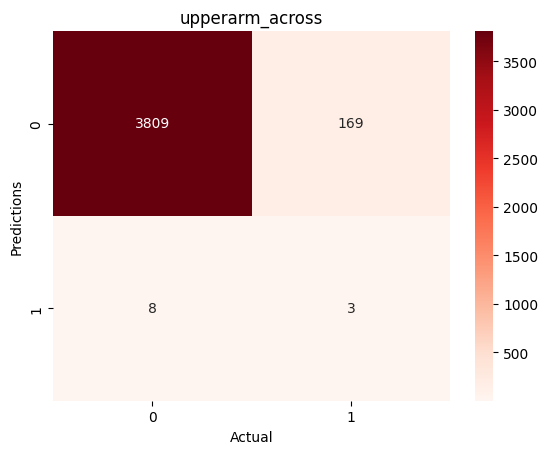

In [74]:
# upperarm_across 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[7],annot=True, fmt='d',cmap='Reds').set(title=keys[7])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [75]:
# upperarm_across 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[7][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[7][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[7][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[7][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[7][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[7][1][1])

0.9556279769365755

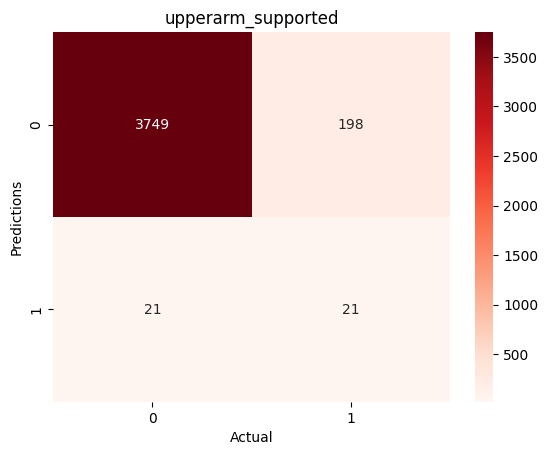

In [77]:
# upperarm_supported 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[8],annot=True, fmt='d',cmap='Reds').set(title=keys[8])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [112]:
# upperarm_supported 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[8][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[8][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[8][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[8][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[8][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[8][1][1])

0.9450990223113562

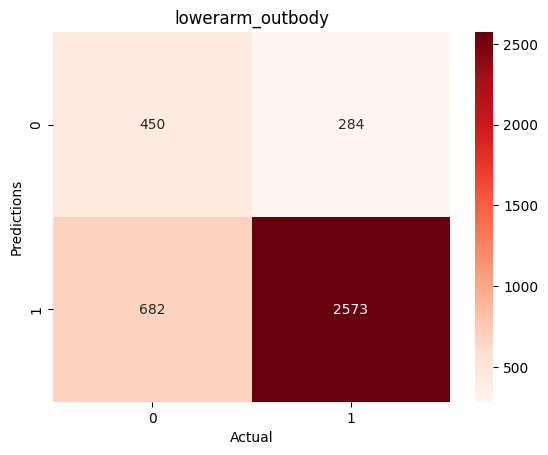

In [78]:
# lower_outbody 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[9],annot=True, fmt='d',cmap='Reds').set(title=keys[9])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [116]:
# lowerarm_outbody 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[10][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[10][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[10][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[10][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[10][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[10][1][1])

0.8483329155176736

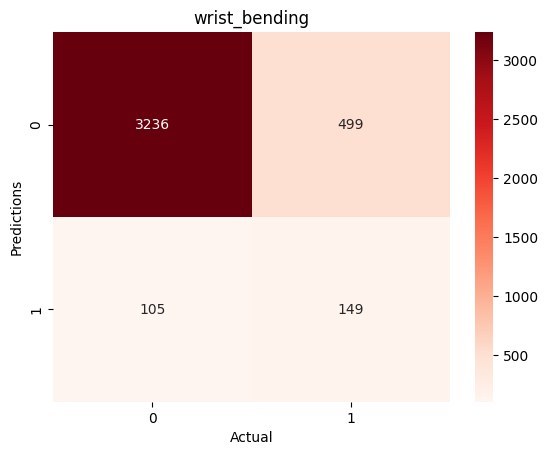

In [79]:
# wrist_bending 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[10],annot=True, fmt='d',cmap='Reds').set(title=keys[10])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [80]:
# wrist_bending 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[10][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[10][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[10][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[10][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[10][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[10][1][1])

0.8485836049135121

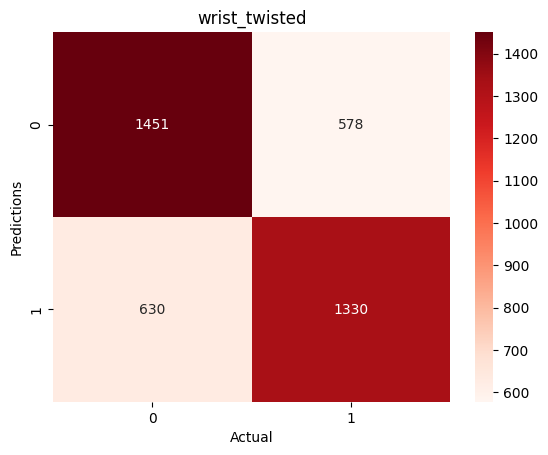

In [81]:
# wrist_twisted 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[11],annot=True, fmt='d',cmap='Reds').set(title=keys[11])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [82]:
# wrist_twisted 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[11][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[11][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[11][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[11][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[11][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[11][1][1])

0.6971672098270243

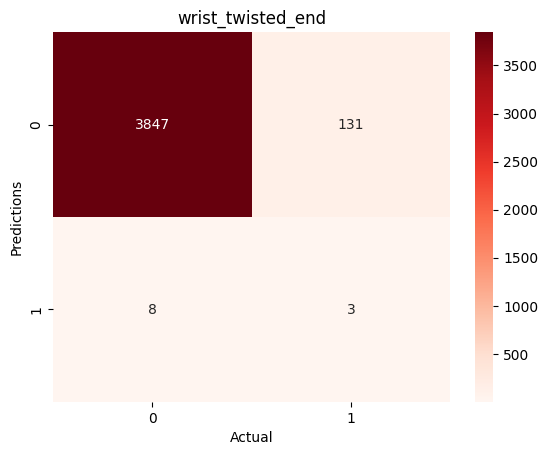

In [83]:
# wrist_twisted_end 혼동행렬 시각화

import seaborn as sns 
sns.heatmap(multilabel_confusion_matrix(preds_numpy,true_numpy)[12],annot=True, fmt='d',cmap='Reds').set(title=keys[12])
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [84]:
# wrist_twisted_end 라벨에 대한 Accuracy 분석

(multilabel_confusion_matrix(preds_numpy,true_numpy)[12][0][0]+multilabel_confusion_matrix(preds_numpy, true_numpy)[12][1][1])/(multilabel_confusion_matrix(preds_numpy,true_numpy)[12][0][0]+
multilabel_confusion_matrix(preds_numpy,true_numpy)[12][0][1]+multilabel_confusion_matrix(preds_numpy, true_numpy)[12][1][0]+multilabel_confusion_matrix(preds_numpy,true_numpy)[12][1][1])

0.9651541739784407

## Evaluation metric

In [93]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score

right_answer=1059+1648+2561+380+2913+310+2905+407+3658+90+3606+114+3894+6+3809+3+3749+21+450+2574+3236+148+1451+1330+3847+3
total_answer=(1059+586+696+1648)*13
print('Accuracy: {}'.format(right_answer/total_answer))
print('Precision: {}'.format(precision_score(true_numpy, preds_numpy,average='samples')))
print('Recall: {}'.format(recall_score(true_numpy, preds_numpy,average='samples')))
print('F1: {}'.format(f1_score(true_numpy, preds_numpy,average='samples')))

Accuracy: 0.8518039994600536
Precision: 0.6641041815208273
Recall: 0.5858945433274839
F1: 0.5796279368011267


## Predictions

In [92]:
import os 
import cv2 

path='/home/iai/heo/hackon/Cropped_test/Json'               # 폴더 경로
os.chdir(path)                                              # 해당 폴더로 이동

test_files=os.listdir(path)

In [93]:
# test폴더 이미지 파일명 추출

test_PNG_list=[]
for file in test_files:
    if '.PNG' in file:
        test_PNG_list.append(file)

In [94]:
test_PNG_list

['F03_P001_A2_W001_D2022-08-25-10-42-30_0087.PNG',
 'F01_P002_A2_W001_D2022-08-23-10-29-00_0160.PNG',
 'F02_P001_A3_W001_D2022-08-24-11-14-35_0369.PNG',
 'F04_P002_A1_W002_D2022-09-16-10-56-38_0599.PNG',
 'F02_P001_A1_W001_D2022-08-24-11-15-55_0612.PNG',
 'F02_P001_A1_W001_D2022-08-24-11-15-55_1370.PNG',
 'F04_P001_A2_W001_D2022-09-16-10-13-12_2370.PNG',
 'F01_P001_A3_W001_D2022-08-23-10-22-00_0369.PNG',
 'F05_P001_A2_W001_D2022-09-23-10-04-45_0139.PNG',
 'F04_P001_A2_W001_D2022-09-16-10-13-12_2530.PNG',
 'F05_P001_A1_W001_D2022-09-23-10-31-57_0756.PNG',
 'F01_P002_A2_W001_D2022-08-23-10-29-00_0149.PNG',
 'F03_P001_A1_W001_D2022-08-25-10-32-05_0086.PNG',
 'F04_P001_A2_W001_D2022-09-16-10-13-12_2431.PNG',
 'F05_P001_A3_W001_D2022-09-23-10-07-45_0862.PNG',
 'F01_P001_A2_W001_D2022-08-23-10-12-00_0144.PNG',
 'F03_P001_A1_W001_D2022-08-25-10-32-05_0806.PNG',
 'F04_P002_A1_W002_D2022-09-16-10-56-38_0968.PNG',
 'F03_P001_A1_W001_D2022-08-25-10-32-05_0720.PNG',
 'F04_P001_A1_W001_D2022-09-16-

In [95]:
import pandas as pd
data_predictions=pd.DataFrame(preds)
data_predictions.columns=keys

In [96]:
data_predictions

,neck_twist,neck_bending,trunk_twist,trunk_bending,legs_supported,upperarm_abduction,upperarm_raised,upperarm_across,upperarm_supported,lowerarm_outbody,wrist_bending,wrist_twisted,wrist_twisted_end
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,1,1,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,1,1,1,1,1,1,1,0,0,1,0,1,0
3985,1,0,0,0,0,0,0,0,0,0,0,1,0
3986,1,0,0,0,0,0,0,0,0,1,0,0,0
3987,1,0,0,0,0,0,0,0,0,0,0,1,0


In [97]:
data_predictions['filename']=test_PNG_list

In [98]:
data_predictions

,neck_twist,neck_bending,trunk_twist,trunk_bending,legs_supported,upperarm_abduction,upperarm_raised,upperarm_across,upperarm_supported,lowerarm_outbody,wrist_bending,wrist_twisted,wrist_twisted_end,filename
0,0,0,0,0,0,0,0,0,0,1,0,0,0,F03_P001_A2_W001_D2022-08-25-10-42-30_0087.PNG
1,0,0,0,0,0,0,0,0,0,1,0,0,0,F01_P002_A2_W001_D2022-08-23-10-29-00_0160.PNG
2,1,0,0,0,0,0,0,0,0,0,0,1,0,F02_P001_A3_W001_D2022-08-24-11-14-35_0369.PNG
3,1,1,1,1,0,0,0,0,0,1,0,1,0,F04_P002_A1_W002_D2022-09-16-10-56-38_0599.PNG
4,0,0,0,0,0,0,0,0,0,1,0,1,0,F02_P001_A1_W001_D2022-08-24-11-15-55_0612.PNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,1,1,1,1,1,1,1,0,0,1,0,1,0,F05_P001_A3_W001_D2022-09-23-10-23-27_0602.PNG
3985,1,0,0,0,0,0,0,0,0,0,0,1,0,F02_P001_A3_W001_D2022-08-24-11-14-35_1484.PNG
3986,1,0,0,0,0,0,0,0,0,1,0,0,0,F05_P001_A1_W001_D2022-09-23-10-31-57_0652.PNG
3987,1,0,0,0,0,0,0,0,0,0,0,1,0,F04_P001_A1_W001_D2022-09-16-10-15-12_0545.PNG


In [81]:
# 컬럼 순서 재배치하기

col1=data_predictions.columns[-1:].to_list()
col2=data_predictions.columns[:-1].to_list() 
new_col=col1+col2 
data_predictions=data_predictions[new_col]
data_predictions

,filename,neck_twist,neck_bending,trunk_twist,trunk_bending,legs_supported,upperarm_abduction,upperarm_raised,upperarm_across,upperarm_supported,lowerarm_outbody,wrist_bending,wrist_twisted,wrist_twisted_end
0,F03_P001_A2_W001_D2022-08-25-10-42-30_0087.PNG,0,0,0,0,0,0,0,0,0,1,0,0,0
1,F01_P002_A2_W001_D2022-08-23-10-29-00_0160.PNG,0,0,0,0,0,0,0,0,0,1,0,0,0
2,F02_P001_A3_W001_D2022-08-24-11-14-35_0369.PNG,1,0,0,0,0,0,0,0,0,0,0,1,0
3,F04_P002_A1_W002_D2022-09-16-10-56-38_0599.PNG,1,1,1,1,0,0,0,0,0,1,0,1,0
4,F02_P001_A1_W001_D2022-08-24-11-15-55_0612.PNG,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,F05_P001_A3_W001_D2022-09-23-10-23-27_0602.PNG,1,1,1,1,1,1,1,0,0,1,0,1,0
3985,F02_P001_A3_W001_D2022-08-24-11-14-35_1484.PNG,1,0,0,0,0,0,0,0,0,0,0,1,0
3986,F05_P001_A1_W001_D2022-09-23-10-31-57_0652.PNG,1,0,0,0,0,0,0,0,0,1,0,0,0
3987,F04_P001_A1_W001_D2022-09-16-10-15-12_0545.PNG,1,0,0,0,0,0,0,0,0,0,0,1,0


## 데이터프레임을 csv 파일로 저장하기

In [82]:
data_predictions.to_csv('evaluation1.csv')

In [83]:
%pwd

'/home/iai/heo/hackon/Cropped_test/Json'

In [84]:
!nvidia-smi

Mon Jan  9 17:57:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.86.01    Driver Version: 515.86.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   32C    P8    23W / 350W |   9984MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------